<a href="https://colab.research.google.com/github/Bhakthipoorna/machine-learning/blob/main/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#Im porting required packages
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras 
from tensorflow.keras import layers

In [127]:
#Reading the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [128]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

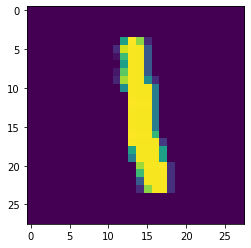

In [129]:
plt.imshow(x_train[6])

In [130]:
x_train[6].shape

(28, 28)

In [131]:
#Scaling the image
X_train=x_train/255
X_test=x_test/255

In [134]:
X_train.shape

(60000, 28, 28)

In [135]:
# convert class vectors to binary class matrices
from keras.utils import to_categorical
Y_train=to_categorical(y_train,10)  #10 is nothing but there are 10 types of images are there in the dataset
Y_test=to_categorical(y_test,10)

In [136]:
Y_train.shape

(60000, 10)

In [137]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model Building

In [171]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
model=Sequential()

In [172]:
# first set of layer

#Convolution layer
model.add(Conv2D( filters=32, kernel_size=(4,4), input_shape=(32,32,1), activation='relu',))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))



#Second set of layer

#Convolution layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,1), activation='relu',))
#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))



In [173]:
#Fattening image from 2D to 1D
model.add(Flatten())

In [174]:
#Adding neurons
model.add(Dense(256,activation='relu'))

In [175]:
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10,activation='softmax'))

In [176]:
#Comilation
model.compile(loss='categorical_crossentopy',optimizer='rmsprop',metrics=['accuracy'])

In [177]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_22 (Dense)             (None, 10)              

In [178]:
model.fit(X_train,Y_train,batch_size=100,epochs=10,validation_split=0.1)

Epoch 1/10


ValueError: ignored